## **Mall Customer Segmentation**
#### This notebook demonstrates clustering mall customers using their annual income and spending score.

### Author - Ayush Gurjar

### **Importing the Libraries:**

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### **Data Collection & Analysis:**

In [2]:
# Load the dataset
mall_data = pd.read_csv('Mall_Customers.csv')

# Display basic statistics
print("Basic Statistics:\n", mall_data.describe())

Basic Statistics:
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [3]:
# finding the number of rows and columns
mall_data.shape

(200, 5)

In [4]:
# getting some informations about the dataset
mall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# checking for missing values
mall_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### **Visualizing Distributions of Key Features:**
#### We will plot the distributions of age, annual income, and spending score to understand the data better.

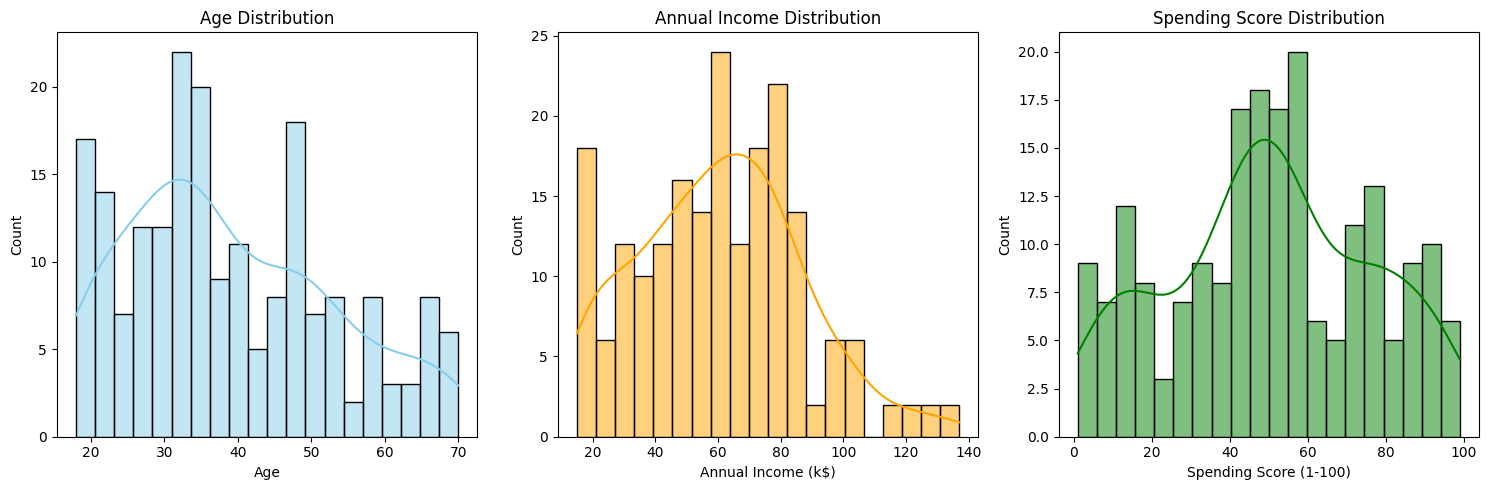

In [6]:

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(mall_data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(mall_data['Annual Income (k$)'], bins=20, kde=True, color='orange')
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(mall_data['Spending Score (1-100)'], bins=20, kde=True, color='green')
plt.title('Spending Score Distribution')
plt.tight_layout()
plt.show()


Converting 'Gender' to Numerical Values:

For correlation analysis, we need to convert the 'Gender' column to numerical data.

In [7]:
# Convert 'Gender' to numerical values
mall_data['Gender'] = mall_data['Gender'].map({'Male': 0, 'Female': 1})

### **Correlation Analysis:**

We will use a heatmap to visualize the correlation between different features.

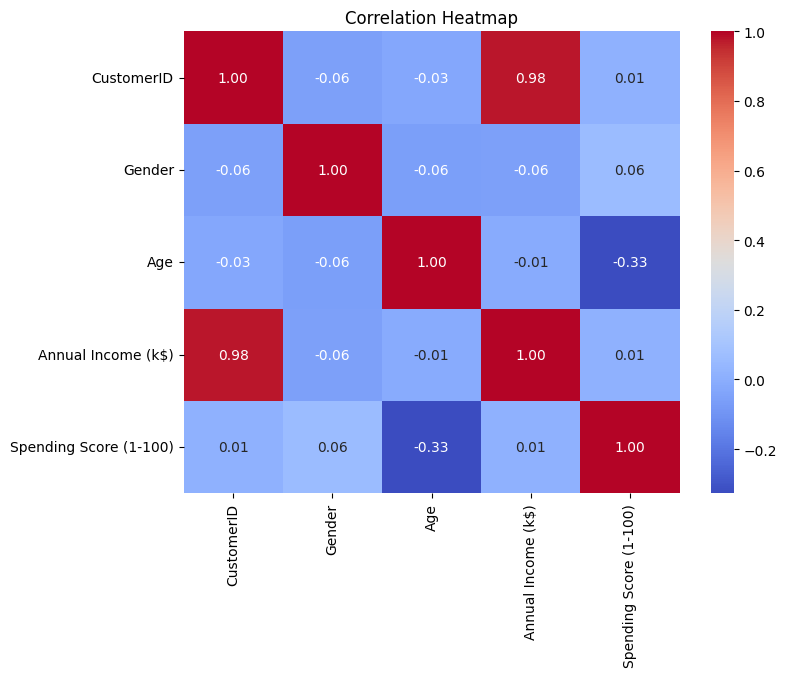

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(mall_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### **Preparing Features for Clustering**
We will use annual income and spending score for clustering. Features are standardized using StandardScaler.

In [9]:
features = mall_data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


### **Elbow Method to Find Optimal Number of Clusters**
We will use the Elbow Method to determine the optimal number of clusters.

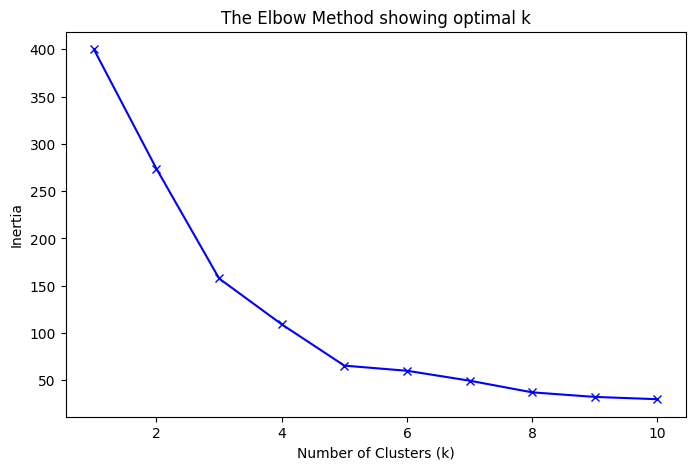

In [10]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing optimal k')
plt.show()

#### From this plot, the bend or "elbow" is observed at k=5, suggesting that 5 is the optimal number of clusters for the data.

##### Optimum Number of Clusters = 5 (As there is very sharp at 5 and from that the WCSS is not changing that much)

### **Applying KMeans Clustering**
We will apply KMeans clustering with the optimal number of clusters found from the Elbow Method.

In [12]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
mall_data['Cluster'] = kmeans.fit_predict(scaled_features)

### **Visualizing the Clusters**
We will create a scatter plot to visualize the customer segments.

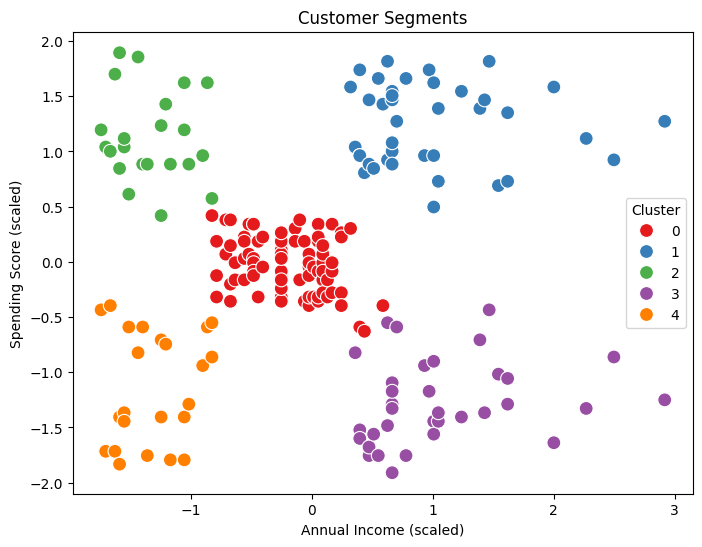

In [13]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_features[:, 0], 
    y=scaled_features[:, 1], 
    hue=mall_data['Cluster'], 
    palette='Set1',
    s=100
)
plt.title('Customer Segments')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend(title='Cluster')
plt.show()


### **Analyzing Cluster Characteristics**
We will look at the characteristics of each cluster by computing the mean values of each feature.

In [14]:
cluster_summary = mall_data.groupby('Cluster').mean()
print("\nCluster Characteristics:\n", cluster_summary)



Cluster Characteristics:
          CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         86.320988  0.592593  42.716049           55.296296   
1        162.000000  0.538462  32.692308           86.538462   
2         23.090909  0.590909  25.272727           25.727273   
3        164.371429  0.457143  41.114286           88.200000   
4         23.000000  0.608696  45.217391           26.304348   

         Spending Score (1-100)  
Cluster                          
0                     49.518519  
1                     82.128205  
2                     79.363636  
3                     17.114286  
4                     20.913043  


## **Insights and Conclusions**:
#### **1. Cluster 0 (Red):** Customers with moderate income and spending scores.
#### **2. Cluster 1 (Blue):** High-income customers with low spending scores. Potential to convert them into higher-spending customers with targeted marketing.
#### **3. Cluster 2 (Green):** Low-income customers with low spending scores. They are likely price-sensitive.
#### **4. Cluster 3 (Purple):** Low-income customers with high spending scores. These could be loyal customers worth retaining.
#### **5. Cluster 4 (Orange):** High-income customers with high spending scores. These are premium customers and can be targeted for exclusive services or products.


## **Recommendations**
#### - Focus on Cluster 4 for premium services. 
####  - Engage Cluster 1 with personalized offers to increase their spending. 
####  - Retain Cluster 3 by offering loyalty programs.
